In [199]:
#from datetime import datetime
#startTime = datetime.now()


***


<br><h2>A2.- Data Analysis and Code |       Case: Apprentice Chef, Inc.</h2>
<h4>MSBA5 - Valencia           |       Machine Learning</h4>
Jorge Hernández Jiménez - Marketing Analyst<br>
Hult International Business School<br><br><br>



***



<h3>Dataset Exploration:</h3>
    

    * Import Libraries
    * Load defined-functions (by Professor Chase Kusterer)
    * Load file
    * Explore dataset

<br>

In [200]:
 # importing libraries
import pandas                   as   pd      # data science essentials
import matplotlib.pyplot        as   plt     # essential graphical output
import seaborn                  as   sns     # enhanced graphical output
import statsmodels.formula.api  as   smf     # regression modeling
import sklearn.linear_model                  # (scikit-learn)linear models (LinearRegression, Ridge, Lasso, ARD)
import random                   as   rand
import pydotplus                             # interprets dot objects

from sklearn.model_selection    import train_test_split            # train-test split
from sklearn.preprocessing      import StandardScaler              # standard scaler
from sklearn.metrics            import confusion_matrix            # confusion matrix
from sklearn.metrics            import roc_auc_score               # auc score
from sklearn.neighbors          import KNeighborsClassifier        # KNN for classification
from sklearn.neighbors          import KNeighborsRegressor         # KNN for Regression
from sklearn.linear_model       import LogisticRegression          # logistic regression
from sklearn.tree               import DecisionTreeClassifier      # classification trees
from sklearn.tree               import export_graphviz             # exports graphics
from sklearn.externals.six      import StringIO                    # saves objects in memory
from IPython.display            import Image                       # displays on frontend
from sklearn.model_selection    import GridSearchCV                # hyperparameter tuning
from sklearn.metrics            import make_scorer                 # customizable scorer
from sklearn.ensemble           import RandomForestClassifier      # random forest
from sklearn.ensemble           import GradientBoostingClassifier  # gbm



 <br><br>Let's load some defined function created by my Professor Chase Kusterer at Hult International School:<br><br>
     1.- <strong>optimal_neighbors :</strong> get the optimal number of neighbors for an specific KNN Classification Model<br>
     2.- <strong>visual_cm :</strong> create visual confussion matrix<br>
     3.- <strong>display_tree :</strong> display a fitted tree model<br>
     4.- <strong>plot_feature_importances :</strong> plot the most important features to develop the fitted tree model<br><br>
    

In [201]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1




########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()



########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img




########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [202]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)


In [203]:
# column names
print(apprentice.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [204]:
apprentice.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0          6              2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0          6              1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1          6              2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1          6              1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0
4   1923.0                   1                 Aegon V Targaryen         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen                   65                   3                            6                          9                   106.00              1                          1                         1                       0          6              2           12                 0                4               1                    0                            90              135.3                   3                        1                   3                    13                  253


<h3>Feature Engineering:</h3>
    

    * Columns addition
    * Outlier thresholds creation
    * Trend-Based Features (thresholds)
    * Dummies from categorical variables (EMAIL_DOMAIN & TASTES_AND PREFERENCES)

<br>

In [205]:
#We are going to create a column for email domain
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [206]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
#apprentice = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

# renaming column to concatenate
email_df.columns = ['NAME' , 'EMAIL_DOMAIN']


# concatenating email_domain with friends DataFrame
apprentice = pd.concat([apprentice, email_df['EMAIL_DOMAIN']],
                   axis = 1)


# printing value counts of personal_email_domain
#apprentice.loc[: ,'EMAIL_DOMAIN'].value_counts()

In [207]:
# STEP 3

#We can create new groups : personal and job emails

# email domain types
PERSONAL_EMAIL_DOMAINS = ['@gmail.com', '@protonmail.com', '@yahoo.com']

JUNK_EMAIL_DOMAINS = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', 
                      '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in apprentice['EMAIL_DOMAIN']:
        if   '@' + domain in PERSONAL_EMAIL_DOMAINS:
             placeholder_lst.append('personal')
            
        elif '@' + domain in JUNK_EMAIL_DOMAINS:
             placeholder_lst.append('junk')
            
            # I did not create a list for jobs, for new clients, there is much more variety of professional emails
            # personal emails are mainly the ones that are in that list, plus a few others we should add, but not
            # necessary for this excercise
        else:
            placeholder_lst.append('job')


# concatenating with original DataFrame
apprentice['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
#apprentice['DOMAIN_GROUP'].value_counts()

In [208]:
apprentice.describe().round(2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00                       1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11                         35.41             150.56                4.44                     0.60                2.79                 13.51               106.43
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32                         26.58              49.45                1.55                     0.64                0.76                  2.33               181.01
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00                    0.00       4.00           0.00         0.00              0.00             0.00            0.00                 0.00                          0.00              33.40                0.00                     0.00                1.00                  5.00                 0.00
25%    1350.00                0.00                39.00                 3.0                         5.00                       3.00                    72.00           1.00                       0.00                      0.00                    0.00       5.00           1.00         1.00              0.00             1.00            0.00                 0.00                         10.00             114.40                3.00                     0.00                2.00                 12.00                 0.00
50%    1740.00                1.00                60.00                 5.0                         7.00                       5.00                    94.16           1.00                       1.00                      0.00                    1.00       6.00           1.00         7.00              0.00             2.00            0.00                 0.00                         30.00             145.60                4.00                     1.00                3.00                 13.00                 0.00
75%    2670.00                1.00                95.00                 7.0                         8.00                       8.00                   117.29           1.00                       2.00                      0.00                    1.00       6.00           2.00        13.00              3.00             4.00            1.00                 0.00                         60.0

In [209]:
#Creating outlier thresholds

AVG_TIME_PER_SITE_VISIT_HI        =     200
AVG_PREP_VID_TIME_LOW             =     50
AVG_PREP_VID_TIME_HI              =     200
AVG_CLICKS_PER_VISIT_LOW          =     10
AVG_CLICKS_PER_VISIT_HI           =     16
TOTAL_MEALS_ORDERED_HI            =     150
UNIQUE_MEALS_PURCH_HI             =     6
CONTACTS_W_CUSTOMER_SERVICE_LOW   =     4
CONTACTS_W_CUSTOMER_SERVICE_HI    =     9
CANCELLATIONS_BEFORE_NOON_HI      =     2
CANCELLATIONS_AFTER_NOON_HI       =     2
PC_LOGINS_LOW                     =     4
PC_LOGINS_HI                      =     7
MOBILE_LOGINS_LOW                 =     0.5
MOBILE_LOGINS_HI                  =     3
WEEKLY_PLAN_HI                    =     5
EARLY_DELIVERIES_HI               =     2
LATE_DELIVERIES_HI                =     3
FOLLOWED_RECOMMENDATIONS_PCT_HI   =     40
LARGEST_ORDER_SIZE_LOW            =     3
LARGEST_ORDER_SIZE_HI             =     6
MASTER_CLASSES_ATTENDED_HI        =     2
TOTAL_PHOTOS_VIEWED_HI            =     300



##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# AVG_TIME_PER_SITE_VISIT
apprentice['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = apprentice.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

apprentice['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                                  value      = 1,
                                                  inplace    = True)


# AVG_PREP_VID_TIME
apprentice['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi  = apprentice.loc[0:,'OUT_AVG_PREP_VID_TIME'][apprentice['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]
condition_low = apprentice.loc[0:,'OUT_AVG_PREP_VID_TIME'][apprentice['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_LOW]

apprentice['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

apprentice['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_low,
                                            value      = 1,
                                            inplace    = True)


# AVG_CLICKS_PER_VISIT
apprentice['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi  = apprentice.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
condition_low = apprentice.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][apprentice['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LOW]

apprentice['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)

apprentice['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_low,
                                               value      = 1,
                                               inplace    = True)


# TOTAL_MEALS_ORDERED
apprentice['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = apprentice.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

apprentice['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)


# UNIQUE_MEALS_PURCH
apprentice['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = apprentice.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][apprentice['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

apprentice['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
apprentice['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi  = apprentice.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_low = apprentice.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LOW]

apprentice['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                      value      = 1,
                                                      inplace    = True)

apprentice['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_low,
                                                      value      = 1,
                                                      inplace    = True)


# CANCELLATIONS_BEFORE_NOON
apprentice['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = apprentice.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][apprentice['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

apprentice['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                                    value      = 1,
                                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
apprentice['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = apprentice.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][apprentice['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

apprentice['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)


# PC_LOGINS
apprentice['OUT_PC_LOGINS'] = 0
condition_hi  = apprentice.loc[0:,'OUT_PC_LOGINS'][apprentice['PC_LOGINS'] > PC_LOGINS_HI]
condition_low = apprentice.loc[0:,'OUT_PC_LOGINS'][apprentice['PC_LOGINS'] < PC_LOGINS_LOW]

apprentice['OUT_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice['OUT_PC_LOGINS'].replace(to_replace = condition_low,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
apprentice['OUT_MOBILE_LOGINS'] = 0
condition_hi  = apprentice.loc[0:,'OUT_MOBILE_LOGINS'][apprentice['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_low = apprentice.loc[0:,'OUT_MOBILE_LOGINS'][apprentice['MOBILE_LOGINS'] < MOBILE_LOGINS_LOW]

apprentice['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

apprentice['OUT_MOBILE_LOGINS'].replace(to_replace = condition_low,
                                        value      = 1,
                                        inplace    = True)


# WEEKLY_PLAN
apprentice['OUT_WEEKLY_PLAN'] = 0
condition_hi = apprentice.loc[0:,'OUT_WEEKLY_PLAN'][apprentice['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

apprentice['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)


# EARLY_DELIVERIES
apprentice['OUT_EARLY_DELIVERIES'] = 0
condition_hi = apprentice.loc[0:,'OUT_EARLY_DELIVERIES'][apprentice['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

apprentice['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                           value      = 1,
                                           inplace    = True)


# LATE_DELIVERIES
apprentice['OUT_LATE_DELIVERIES'] = 0
condition_hi = apprentice.loc[0:,'OUT_LATE_DELIVERIES'][apprentice['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

apprentice['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                          value      = 1,
                                          inplace    = True)


# FOLLOWED_RECOMMENDATIONS_PCT
apprentice['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = apprentice.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]

apprentice['OUT_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                                       value      = 1,
                                                       inplace    = True)


# LARGEST_ORDER_SIZE
apprentice['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi  = apprentice.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]
condition_low = apprentice.loc[0:,'OUT_LARGEST_ORDER_SIZE'][apprentice['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_LOW]

apprentice['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

apprentice['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_low,
                                             value      = 1,
                                             inplace    = True)


# MASTER_CLASSES_ATTENDED
apprentice['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = apprentice.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][apprentice['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

apprentice['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                                  value      = 1,
                                                  inplace    = True)


# TOTAL_PHOTOS_VIEWED
apprentice['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = apprentice.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

apprentice['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)


In [210]:
# Creating trend-based thresholds

AVG_TIME_PER_SITE_VISIT_CHANGE_HI         =     300          # data scatters above this point
AVG_PREP_VID_TIME_CHANGE_HI               =     300          # data scatters above this point
TOTAL_MEALS_ORDERED_CHANGE_HI             =     200          # data scatters above this point
TOTAL_PHOTOS_VIEWED_CHANGE_HI             =     500          # data scatters above this point
FOLLOWED_RECOMMENDATIONS_PCT_CHANGE_HI    =     30           # trend changes above this point
AVG_CLICKS_PER_VISIT_CHANGE_HI            =     11           # trend changes above this point
CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI     =     10           # trend changes above this point
LARGEST_ORDER_SIZE_CHANGE_HI              =     7            # trend changes above this point

WEEKLY_PLAN_CHANGE_AT                     =     0            # zero inflated
UNIQUE_MEALS_PURCH_CHANGE_AT              =     0            # zero inflated
PC_LOGINS_CHANGE_AT                       =     7            # different at 7
MOBILE_LOGINS_CHANGE_AT                   =     3            # different at 3
MASTER_CLASSES_ATTENDED_CHANGE_AT         =     3            # different at 3
TOTAL_PHOTOS_VIEWED_CHANGE_AT             =     0            # zero inflated


##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers

########################################
## change above threshold             ##
########################################

# AVG_TIME_PER_SITE_VISIT
apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT'] = 0
condition = apprentice.loc[0:,'CHANGE_AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_CHANGE_HI]

apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                                     value      = 1,
                                                     inplace    = True)


# AVG_PREP_VID_TIME
apprentice['CHANGE_AVG_PREP_VID_TIME'] = 0
condition = apprentice.loc[0:,'CHANGE_AVG_PREP_VID_TIME'][apprentice['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_CHANGE_HI]

apprentice['CHANGE_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                               value      = 1,
                                               inplace    = True)


# TOTAL_MEALS_ORDERED
apprentice['CHANGE_TOTAL_MEALS_ORDERED'] = 0
condition = apprentice.loc[0:,'CHANGE_TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_CHANGE_HI]

apprentice['CHANGE_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                                 value      = 1,
                                                 inplace    = True)


# TOTAL_PHOTOS_VIEWED
apprentice['CHANGE_TOTAL_PHOTOS_VIEWED'] = 0
condition = apprentice.loc[0:,'CHANGE_TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_CHANGE_HI]

apprentice['CHANGE_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                                 value      = 1,
                                                 inplace    = True)


# FOLLOWED_RECOMMENDATIONS_PCT
apprentice['CHANGE_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition = apprentice.loc[0:,'CHANGE_FOLLOWED_RECOMMENDATIONS_PCT'][apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_CHANGE_HI]

apprentice['CHANGE_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition,
                                                          value      = 1,
                                                          inplace    = True)


# AVG_CLICKS_PER_VISIT
apprentice['CHANGE_AVG_CLICKS_PER_VISIT'] = 0
condition = apprentice.loc[0:,'CHANGE_AVG_CLICKS_PER_VISIT'][apprentice['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_CHANGE_HI]

apprentice['CHANGE_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                                  value      = 1,
                                                  inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = apprentice.loc[0:,'CHANGE_CONTACTS_W_CUSTOMER_SERVICE'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI]

apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                                         value      = 1,
                                                         inplace    = True)


# LARGEST_ORDER_SIZE
apprentice['CHANGE_LARGEST_ORDER_SIZE'] = 0
condition = apprentice.loc[0:,'CHANGE_LARGEST_ORDER_SIZE'][apprentice['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_CHANGE_HI]

apprentice['CHANGE_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)




########################################
## change at threshold                ##
########################################

# WEEKLY_PLAN
apprentice['CHANGE_WEEKLY_PLAN'] = 0
condition = apprentice.loc[0:,'CHANGE_WEEKLY_PLAN'][apprentice['WEEKLY_PLAN'] == WEEKLY_PLAN_CHANGE_AT]

apprentice['CHANGE_WEEKLY_PLAN'].replace(to_replace = condition,
                                         value      = 1,
                                         inplace    = True)


# TOTAL_PHOTOS_VIEWED
apprentice['CHANGE2_TOTAL_PHOTOS_VIEWED'] = 0
condition = apprentice.loc[0:,'CHANGE2_TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_CHANGE_AT]

apprentice['CHANGE2_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                                  value      = 1,
                                                  inplace    = True)


# UNIQUE_MEALS_PURCH
apprentice['CHANGE_UNIQUE_MEALS_PURCH'] = 0
condition = apprentice.loc[0:,'CHANGE_UNIQUE_MEALS_PURCH'][apprentice['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_CHANGE_AT]

apprentice['CHANGE_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)


# PC_LOGINS
apprentice['CHANGE_PC_LOGINS'] = 0
condition = apprentice.loc[0:,'CHANGE_PC_LOGINS'][apprentice['PC_LOGINS'] == PC_LOGINS_CHANGE_AT]

apprentice['CHANGE_PC_LOGINS'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


# MOBILE_LOGINS
apprentice['CHANGE_MOBILE_LOGINS'] = 0
condition = apprentice.loc[0:,'CHANGE_MOBILE_LOGINS'][apprentice['MOBILE_LOGINS'] == MOBILE_LOGINS_CHANGE_AT]

apprentice['CHANGE_MOBILE_LOGINS'].replace(to_replace = condition,
                                         value      = 1,
                                         inplace    = True)


# MASTER_CLASSES_ATTENDED
apprentice['CHANGE_MASTER_CLASSES_ATTENDED'] = 0
condition = apprentice.loc[0:,'CHANGE_MASTER_CLASSES_ATTENDED'][apprentice['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_CHANGE_AT]

apprentice['CHANGE_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                                     value      = 1,
                                                     inplace    = True)




 <br>We are going to get the dummies of the domain group, and then <br>
 remove (with drop) the column from the dataframe and add it to the dataframe<br><br>

In [211]:
# one hot encoding categorical variables
ONE_HOT_DOMAIN_GROUP = pd.get_dummies(apprentice['DOMAIN_GROUP'])
ONE_HOT_TASTES_AND_PREFERENCES = pd.get_dummies(apprentice['TASTES_AND_PREFERENCES'])



# dropping categorical variables after they've been encoded
apprentice = apprentice.drop('DOMAIN_GROUP', axis = 1)
apprentice = apprentice.drop('TASTES_AND_PREFERENCES', axis = 1)


# joining codings together
apprentice = apprentice.join([ONE_HOT_DOMAIN_GROUP, ONE_HOT_TASTES_AND_PREFERENCES])


# saving new columns
new_columns = apprentice.columns

In [212]:
# column names
apprentice.columns

Index([                            'REVENUE',                  'CROSS_SELL_SUCCESS',                                'NAME',                               'EMAIL',                          'FIRST_NAME',                         'FAMILY_NAME',                 'TOTAL_MEALS_ORDERED',                  'UNIQUE_MEALS_PURCH',         'CONTACTS_W_CUSTOMER_SERVICE',           'PRODUCT_CATEGORIES_VIEWED',             'AVG_TIME_PER_SITE_VISIT',                       'MOBILE_NUMBER',           'CANCELLATIONS_BEFORE_NOON',            'CANCELLATIONS_AFTER_NOON',                           'PC_LOGINS',                       'MOBILE_LOGINS',                         'WEEKLY_PLAN',                    'EARLY_DELIVERIES',                     'LATE_DELIVERIES',                      'PACKAGE_LOCKER',                 'REFRIGERATED_LOCKER',        'FOLLOWED_RECOMMENDATIONS_PCT',                   'AVG_PREP_VID_TIME',                  'LARGEST_ORDER_SIZE',             'MASTER_CLASSES_ATTENDED',
                  

In [213]:
apprentice.columns = ['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
                      'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                      'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',           
                      'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS',
                      'MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
                      'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME',                  
                      'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',                
                      'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_DOMAIN', 'OUT_AVG_TIME_PER_SITE_VISIT',
                      'OUT_AVG_PREP_VID_TIME', 'OUT_AVG_CLICKS_PER_VISIT', 'OUT_TOTAL_MEALS_ORDERED',
                      'OUT_UNIQUE_MEALS_PURCH', 'OUT_CONTACTS_W_CUSTOMER_SERVICE', 'OUT_CANCELLATIONS_BEFORE_NOON',
                      'OUT_CANCELLATIONS_AFTER_NOON', 'OUT_PC_LOGINS', 'OUT_MOBILE_LOGINS', 'OUT_WEEKLY_PLAN',
                      'OUT_EARLY_DELIVERIES','OUT_LATE_DELIVERIES', 'OUT_FOLLOWED_RECOMMENDATIONS_PCT',
                      'OUT_LARGEST_ORDER_SIZE', 'OUT_MASTER_CLASSES_ATTENDED', 'OUT_TOTAL_PHOTOS_VIEWED',
                      'CHANGE_AVG_TIME_PER_SITE_VISIT', 'CHANGE_AVG_PREP_VID_TIME', 'CHANGE_TOTAL_MEALS_ORDERED',
                      'CHANGE_TOTAL_PHOTOS_VIEWED', 'CHANGE_FOLLOWED_RECOMMENDATIONS_PCT',         
                      'CHANGE_AVG_CLICKS_PER_VISIT', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE',
                      'CHANGE_LARGEST_ORDER_SIZE', 'CHANGE_WEEKLY_PLAN', 'CHANGE2_TOTAL_PHOTOS_VIEWED',
                      'CHANGE_UNIQUE_MEALS_PURCH', 'CHANGE_PC_LOGINS','CHANGE_MOBILE_LOGINS',      
                      'CHANGE_MASTER_CLASSES_ATTENDED', 'JOB', 'JUNK', 'PERSONAL', 
                      'TASTES_AND_PREFERENCES_NO', 'TASTES_AND_PREFERENCES_YES']  # re-labelling Email Domains, and
                                                                                  # TASTES_AND_PREFERENCES
                                                                                  # easier to understand


# checking results
apprentice.columns


Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'EMAIL_DOMAIN', 'OUT_AVG_TIME_PER_SITE_VISIT', 'OUT_AVG_PREP_VID_TIME', 'OUT_AVG_CLICKS_PER_VISIT', 'OUT_TOTAL_MEALS_ORDERED', 'OUT_UNIQUE_MEALS_PURCH', 'OUT_CONTACTS_W_CUSTOMER_SERVICE', 'OUT_CANCELLATIONS_BEFORE_NOON', 'OUT_CANCELLATIONS_AFTER_NOON', 'OUT_PC_LOGINS', 'OUT_MOBILE_LOGINS', 'OUT_WEEKLY_PLAN', 'OUT_EARLY_DELIVERIES', 'OUT_LATE_DELIVERIES', 'OUT_FOLLOWED_RECOMMENDATIONS_PCT',
       'OUT_LARGEST

In [214]:
# checking for missing values
apprentice.isnull().sum()

REVENUE                                 0
CROSS_SELL_SUCCESS                      0
NAME                                    0
EMAIL                                   0
FIRST_NAME                              0
FAMILY_NAME                            47
TOTAL_MEALS_ORDERED                     0
UNIQUE_MEALS_PURCH                      0
CONTACTS_W_CUSTOMER_SERVICE             0
PRODUCT_CATEGORIES_VIEWED               0
AVG_TIME_PER_SITE_VISIT                 0
MOBILE_NUMBER                           0
CANCELLATIONS_BEFORE_NOON               0
CANCELLATIONS_AFTER_NOON                0
PC_LOGINS                               0
MOBILE_LOGINS                           0
WEEKLY_PLAN                             0
EARLY_DELIVERIES                        0
LATE_DELIVERIES                         0
PACKAGE_LOCKER                          0
REFRIGERATED_LOCKER                     0
FOLLOWED_RECOMMENDATIONS_PCT            0
AVG_PREP_VID_TIME                       0
LARGEST_ORDER_SIZE                

In [215]:
# Save in excel here - apprentice_rich:
# apprentice.to_excel('apprentice_rich.xlsx',
#                     index = False)

In [216]:
# Load from excel here - apprentice_rich:
# apprentice = pd.read_excel('apprentice_rich.xlsx')

<br><h3>Model Development:</h3>
    
    * Plotting correlations between the dependent variable (CROSS_SELL_SUCCESS) and independent variables
    * Developing candidate models (chechking R-squared, p-values and correlations)
    * Train and test datasets
    * Model tournament
            * LogisticRegression()
            * KNN Classification()
            * Decission Tree Classifier
            * GridSearchCV
            * Random Forest
    
<br>

 <br>I have chosen CROSS_SELL_SUCCESS as the response variable for this model,
 being binary (0 = fail sale ; 1 = success sale); it perfectly cover <br>
 a straight answer to our analysis<br><br><br>
 
 I'm not going to use these variables anymore... <br>

In [217]:
# making a copy of apprentice
final_apprentice = apprentice.copy()


# dropping REVENUE, EMAIL, NAME, FIRST_NAME, SECOND_NAME, EMAIL_DOMAIN
final_apprentice = final_apprentice.drop(['CROSS_SELL_SUCCESS',
                                          'EMAIL',
                                          'NAME',
                                          'FIRST_NAME',
                                          'FAMILY_NAME',
                                          'EMAIL_DOMAIN'],
                                           axis = 1)

final_apprentice.head(n = 5)

REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  OUT_AVG_TIME_PER_SITE_VISIT  OUT_AVG_PREP_VID_TIME  OUT_AVG_CLICKS_PER_VISIT  OUT_TOTAL_MEALS_ORDERED  OUT_UNIQUE_MEALS_PURCH  OUT_CONTACTS_W_CUSTOMER_SERVICE  OUT_CANCELLATIONS_BEFORE_NOON  OUT_CANCELLATIONS_AFTER_NOON  OUT_PC_LOGINS  OUT_MOBILE_LOGINS  OUT_WEEKLY_PLAN  OUT_EARLY_DELIVERIES  OUT_LATE_DELIVERIES  OUT_FOLLOWED_RECOMMENDATIONS_PCT  OUT_LARGEST_ORDER_SIZE  OUT_MASTER_CLASSES_ATTENDED  OUT_TOTAL_PHOTOS_VIEWED  CHANGE_AVG_TIME_PER_SITE_VISIT  CHANGE_AVG_PREP_VID_TIME  CHANGE_TOTAL_MEALS_ORDERED  \
0   1880.0                  118                   4                            7                          5                    86.00              1                          2                         1          6              2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0                            0                      0                         0                        0                       0                                0                              0                             0              0                  0                1                     0                    0                                 1                       0                            0                        0                               0                         0                           0   
1   1495.0                   44                   3                            6                          3                   125.60              1                          0                         1          6              1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90                            0                      0                         0                        0                       0                                0                              0                             0              0                  0                1                     0                    1                                 1                       0                            0                        0                               0                         0                           0   
2   2572.5                   38                   1                            5                          3                    58.00              1                          5                         0          6              2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0                            0                      0                         0                        0                       0                                0                              1                             0              0                  0                1                     0                    0                                 1                       0                            0                        0                               0                         0                           0   
3   1647.0                   76                   3            

In [218]:
# Save in excel here - apprentice_final
# apprentice.to_excel('apprentice_final.xlsx',
#                     index = False)

In [219]:
# Load from excel here - apprentice_final
# apprentice = pd.read_excel('apprentice_final.xlsx')

In [220]:
# Let's plot some correlations

df_corr = apprentice.corr().round(2)

# printing (Pearson) correlations with REVENUE
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                     1.00
CHANGE_FOLLOWED_RECOMMENDATIONS_PCT    0.56
OUT_FOLLOWED_RECOMMENDATIONS_PCT       0.51
FOLLOWED_RECOMMENDATIONS_PCT           0.46
JOB                                    0.19
CANCELLATIONS_BEFORE_NOON              0.16
OUT_CANCELLATIONS_BEFORE_NOON          0.13
MOBILE_NUMBER                          0.10
TASTES_AND_PREFERENCES_YES             0.08
REFRIGERATED_LOCKER                    0.07
MASTER_CLASSES_ATTENDED                0.04
PACKAGE_LOCKER                         0.04
PC_LOGINS                              0.04
CONTACTS_W_CUSTOMER_SERVICE            0.04
PERSONAL                               0.04
AVG_PREP_VID_TIME                      0.03
MEDIAN_MEAL_RATING                     0.03
OUT_CANCELLATIONS_AFTER_NOON           0.03
EARLY_DELIVERIES                       0.02
LARGEST_ORDER_SIZE                     0.02
OUT_UNIQUE_MEALS_PURCH                 0.02
CHANGE_WEEKLY_PLAN                     0.02
CHANGE_AVG_PREP_VID_TIME        

In [221]:
# declaring explanatory variables
apprentice_data = apprentice.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
apprentice_target = apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
                apprentice_data,
                apprentice_target,
                test_size = 0.25,
                random_state = 222,
                stratify = apprentice_target)


# merging training data for statsmodels
apprentice_train = pd.concat([X_train, y_train], axis = 1)

 <br>Because of the response variable is a binary variable, it only take two values (0,1) <br>
 We will proceed to the development of the model through a logistic regression.<br>
 I will first create a small model with the most correlated variable just to get an idea.<br><br>

In [222]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """   apprentice_train['CROSS_SELL_SUCCESS'] ~ 
                                           apprentice_train['CHANGE_FOLLOWED_RECOMMENDATIONS_PCT']
                                            """,
                                            data = apprentice_train)



# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

         Current function value: 0.410436
         Iterations: 35


C:\Users\jhj95\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     apprentice_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                              Logit   Df Residuals:                     1457
Method:                                               MLE   Df Model:                            1
Date:                                    Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3464
Time:                                            21:45:20   Log-Likelihood:                -598.83
converged:                                          False   LL-Null:                       -916.19
Covariance Type:                                nonrobust   LLR p-value:                4.667e-140
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -0.1616      0.068     -2.373      0.018      -0.295      -0.028
apprentice_train['CHANGE_FOLLOWED_RECOMMENDATIONS_PCT']    31.2567   2.32e+05      0.000      1.000   -4.56e+05    4.56e+05
===========================================================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [223]:
# formatting each explanatory variable for statsmodels
for val in final_apprentice:
    print(f"apprentice_train['{val}']+")

apprentice_train['REVENUE']+
apprentice_train['TOTAL_MEALS_ORDERED']+
apprentice_train['UNIQUE_MEALS_PURCH']+
apprentice_train['CONTACTS_W_CUSTOMER_SERVICE']+
apprentice_train['PRODUCT_CATEGORIES_VIEWED']+
apprentice_train['AVG_TIME_PER_SITE_VISIT']+
apprentice_train['MOBILE_NUMBER']+
apprentice_train['CANCELLATIONS_BEFORE_NOON']+
apprentice_train['CANCELLATIONS_AFTER_NOON']+
apprentice_train['PC_LOGINS']+
apprentice_train['MOBILE_LOGINS']+
apprentice_train['WEEKLY_PLAN']+
apprentice_train['EARLY_DELIVERIES']+
apprentice_train['LATE_DELIVERIES']+
apprentice_train['PACKAGE_LOCKER']+
apprentice_train['REFRIGERATED_LOCKER']+
apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']+
apprentice_train['AVG_PREP_VID_TIME']+
apprentice_train['LARGEST_ORDER_SIZE']+
apprentice_train['MASTER_CLASSES_ATTENDED']+
apprentice_train['MEDIAN_MEAL_RATING']+
apprentice_train['AVG_CLICKS_PER_VISIT']+
apprentice_train['TOTAL_PHOTOS_VIEWED']+
apprentice_train['OUT_AVG_TIME_PER_SITE_VISIT']+
apprentice_train['OUT_AV

In [224]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ apprentice_train['CROSS_SELL_SUCCESS'] ~
                                        apprentice_train['REVENUE']+
                                        apprentice_train['TOTAL_MEALS_ORDERED']+
                                        apprentice_train['UNIQUE_MEALS_PURCH']+
                                        apprentice_train['CONTACTS_W_CUSTOMER_SERVICE']+
                                        apprentice_train['PRODUCT_CATEGORIES_VIEWED']+
                                        apprentice_train['AVG_TIME_PER_SITE_VISIT']+
                                        apprentice_train['MOBILE_NUMBER']+
                                        apprentice_train['CANCELLATIONS_BEFORE_NOON']+
                                        apprentice_train['CANCELLATIONS_AFTER_NOON']+
                                        apprentice_train['PC_LOGINS']+
                                        apprentice_train['MOBILE_LOGINS']+
                                        apprentice_train['WEEKLY_PLAN']+
                                        apprentice_train['EARLY_DELIVERIES']+
                                        apprentice_train['LATE_DELIVERIES']+
                                        apprentice_train['PACKAGE_LOCKER']+
                                        apprentice_train['REFRIGERATED_LOCKER']+
                                        apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']+
                                        apprentice_train['AVG_PREP_VID_TIME']+
                                        apprentice_train['LARGEST_ORDER_SIZE']+
                                        apprentice_train['MASTER_CLASSES_ATTENDED']+
                                        apprentice_train['MEDIAN_MEAL_RATING']+
                                        apprentice_train['AVG_CLICKS_PER_VISIT']+
                                        apprentice_train['TOTAL_PHOTOS_VIEWED']+
                                        apprentice_train['OUT_AVG_TIME_PER_SITE_VISIT']+
                                        apprentice_train['OUT_AVG_PREP_VID_TIME']+
                                        apprentice_train['OUT_AVG_CLICKS_PER_VISIT']+
                                        apprentice_train['OUT_TOTAL_MEALS_ORDERED']+
                                        apprentice_train['OUT_UNIQUE_MEALS_PURCH']+
                                        apprentice_train['OUT_CONTACTS_W_CUSTOMER_SERVICE']+
                                        apprentice_train['OUT_CANCELLATIONS_BEFORE_NOON']+
                                        apprentice_train['OUT_MOBILE_LOGINS']+
                                        apprentice_train['OUT_WEEKLY_PLAN']+
                                        apprentice_train['OUT_EARLY_DELIVERIES']+
                                        apprentice_train['OUT_LATE_DELIVERIES']+
                                        apprentice_train['OUT_FOLLOWED_RECOMMENDATIONS_PCT']+
                                        apprentice_train['OUT_LARGEST_ORDER_SIZE']+
                                        apprentice_train['OUT_MASTER_CLASSES_ATTENDED']+
                                        apprentice_train['OUT_TOTAL_PHOTOS_VIEWED']+
                                        apprentice_train['CHANGE_AVG_TIME_PER_SITE_VISIT']+
                                        apprentice_train['CHANGE_AVG_PREP_VID_TIME']+
                                        apprentice_train['CHANGE_TOTAL_MEALS_ORDERED']+
                                        apprentice_train['CHANGE_TOTAL_PHOTOS_VIEWED']+
                                        apprentice_train['CHANGE_AVG_CLICKS_PER_VISIT']+
                                        apprentice_train['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                        apprentice_train['CHANGE_LARGEST_ORDER_SIZE']+
                                        apprentice_train['CHANGE_WEEKLY_PLAN']+
                                        apprentice_train['CHANGE2_TOTAL_PHOTOS_VIEWED']+
                                        apprentice_train['CHANGE_PC_LOGINS']+
                                        apprentice_train['CHANGE_MOBILE_LOGINS']+
                                        apprentice_train['CHANGE_MASTER_CLASSES_ATTENDED']+
                                        apprentice_train['JOB']+
                                        apprentice_train['JUNK']+
                                        apprentice_train['TASTES_AND_PREFERENCES_YES']
                                        """,
                                        data = apprentice_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.379567
         Iterations: 35


C:\Users\jhj95\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     apprentice_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                              Logit   Df Residuals:                     1406
Method:                                               MLE   Df Model:                           52
Date:                                    Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3956
Time:                                            21:45:21   Log-Likelihood:                -553.79
converged:                                          False   LL-Null:                       -916.19
Covariance Type:                                nonrobust   LLR p-value:                2.689e-119
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -2.4364      1.767     -1.379      0.168      -5.899       1.026
apprentice_train['REVENUE']                               -0.0001      0.000     -1.042      0.298      -0.000       0.000
apprentice_train['TOTAL_MEALS_ORDERED']                    0.0066      0.003      2.308      0.021       0.001       0.012
apprentice_train['UNIQUE_MEALS_PURCH']                    -0.0446      0.056     -0.801      0.423      -0.154       0.065
apprentice_train['CONTACTS_W_CUSTOMER_SERVICE']            0.0451      0.057      0.786      0.432      -0.067       0.157
apprentice_train['PRODUCT_CATEGORIES_VIEWED']             -0.0037      0.025     -0.151      0.880      -0.052       0.044
apprentice_train['AVG_TIME_PER_SITE_VISIT']                0.0027      0.002      1.278      0.201      -0.001       0.007
apprentice_train['MOBILE_NUMBER']                          0.8934      0.223      4.007      0.000       0.456       1.330
apprentice_train['CANCELLATIONS_BEFORE_NOON']              0.3894      0.090      4.310      0.000       0.212       0.566
apprentice_train['CANCELLATIONS_AFTER_NOON']              -0.1581      0.162     -0.974      0.330      -0.476       0.160
apprentice_train['PC_LOGINS']                              0.2368      0.139      1.708      0.088      -0.035       0.509
apprentice_train['MOBILE_LOGINS']                         -0.3645      0.150     -2.422      0.015      -0.659      -0.070
apprentice_train['WEEKLY_PLAN']                            0.0025      0.007      0.353      0.724      -0.011       0.017
apprentice_train['EARLY_DELIVERIES']                       0.0437      0.068      0.643      0.520      -0.090       0.177
apprentice_train['LATE_DELIVERIES']                        0.0831      0.044      1.877      0.060      -0.004       0.170
apprentice_train['PACKAGE_LOCKER']                        -0.1338      0.176     -0.760      0.447      -0.479       0.211
apprentice_train['REFRIGERATED_LOCKER']                    0.2936      0.281      1.043      0.297      -0.258       0.845
apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']           0.0056      0.007      0.837      0.402      -0.008       0.019
apprentice_train['AVG_PREP_VID_TIME']                      0.0028      0.004      0.718      0.473      -0.005       0.010
apprentice_train['LARGEST_ORDER_SIZE']                     0.0069      0.092      0.074      0.941      -0.174       0.188
apprentice_train['MASTER_CLASSES_ATTENDED']                0.2263      0.142      1.599      0.110      -0.051       0.504
apprentice_train['MEDIAN_MEAL_RATING']                    -0.2319      0.206     -1.124      0.261      -0.63

 <br><br>Now let's create a model with <strong>p-values < 0.05 </strong><br>

In [225]:
# instantiating a logistic regression model object
logistic_model1 = smf.logit(formula = """ apprentice_train['CROSS_SELL_SUCCESS'] ~
                                        apprentice_train['TOTAL_MEALS_ORDERED']+
                                        apprentice_train['MOBILE_NUMBER']+
                                        apprentice_train['CANCELLATIONS_BEFORE_NOON']+
                                        apprentice_train['MOBILE_LOGINS']+
                                        apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']+
                                        apprentice_train['CHANGE_TOTAL_MEALS_ORDERED']+
                                        apprentice_train['JOB']+
                                        apprentice_train['JUNK']+
                                        apprentice_train['TASTES_AND_PREFERENCES_YES']
                                        """,
                                        data = apprentice_train)


# fitting the model object
results_model1 = logistic_model1.fit()


# checking the results SUMMARY
results_model1.summary()

Optimization terminated successfully.
         Current function value: 0.437303
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     apprentice_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                              Logit   Df Residuals:                     1449
Method:                                               MLE   Df Model:                            9
Date:                                    Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3036
Time:                                            21:45:21   Log-Likelihood:                -638.03
converged:                                           True   LL-Null:                       -916.19
Covariance Type:                                nonrobust   LLR p-value:                4.878e-114
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -1.8583      0.348     -5.346      0.000      -2.540      -1.177
apprentice_train['TOTAL_MEALS_ORDERED']              0.0044      0.002      2.571      0.010       0.001       0.008
apprentice_train['MOBILE_NUMBER']                    0.7534      0.203      3.709      0.000       0.355       1.152
apprentice_train['CANCELLATIONS_BEFORE_NOON']        0.2399      0.050      4.813      0.000       0.142       0.338
apprentice_train['MOBILE_LOGINS']                   -0.2852      0.130     -2.194      0.028      -0.540      -0.030
apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0578      0.004     14.446      0.000       0.050       0.066
apprentice_train['CHANGE_TOTAL_MEALS_ORDERED']      -1.1427      0.470     -2.430      0.015      -2.064      -0.221
apprentice_train['JOB']                              0.6496      0.162      4.021      0.000       0.333       0.966
apprentice_train['JUNK']                            -1.2453      0.178     -7.007      0.000      -1.594      -0.897
apprentice_train['TASTES_AND_PREFERENCES_YES']       0.3390      0.151      2.246      0.025       0.043       0.635
====================================================================================================================
"""

 <br><br>Let's create now a model based <strong>1st on p-value < 0.05</strong> and <strong>2nd corr > 0.08</strong> <br>

In [226]:
# instantiating a logistic regression model object
logistic_model2 = smf.logit(formula = """ apprentice_train['CROSS_SELL_SUCCESS'] ~
                                        apprentice_train['MOBILE_NUMBER']+
                                        apprentice_train['CANCELLATIONS_BEFORE_NOON']+
                                        apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']+
                                        apprentice_train['JOB']+
                                        apprentice_train['JUNK']+
                                        apprentice_train['TASTES_AND_PREFERENCES_YES']
                                        """,
                                        data = apprentice_train)


# fitting the model object
results_model2 = logistic_model2.fit()


# checking the results SUMMARY
results_model2.summary()

Optimization terminated successfully.
         Current function value: 0.441555
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     apprentice_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                              Logit   Df Residuals:                     1452
Method:                                               MLE   Df Model:                            6
Date:                                    Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2968
Time:                                            21:45:21   Log-Likelihood:                -644.23
converged:                                           True   LL-Null:                       -916.19
Covariance Type:                                nonrobust   LLR p-value:                2.872e-114
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -1.9910      0.256     -7.792      0.000      -2.492      -1.490
apprentice_train['MOBILE_NUMBER']                    0.7672      0.201      3.811      0.000       0.373       1.162
apprentice_train['CANCELLATIONS_BEFORE_NOON']        0.2393      0.049      4.867      0.000       0.143       0.336
apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0573      0.004     14.455      0.000       0.050       0.065
apprentice_train['JOB']                              0.6643      0.161      4.133      0.000       0.349       0.979
apprentice_train['JUNK']                            -1.2501      0.176     -7.088      0.000      -1.596      -0.904
apprentice_train['TASTES_AND_PREFERENCES_YES']       0.3155      0.150      2.107      0.035       0.022       0.609
====================================================================================================================
"""

 <br><br>Let's create now a model based <strong>1st on corr > 0.10</strong> and <strong>2nd p-value < 0.05 </strong><br>

In [227]:
# instantiating a logistic regression model object
logistic_model3 = smf.logit(formula = """ apprentice_train['CROSS_SELL_SUCCESS'] ~
                                        apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']+
                                        apprentice_train['JUNK']+
                                        apprentice_train['JOB']+
                                        apprentice_train['CANCELLATIONS_BEFORE_NOON']
                                        """,
                                        data = apprentice_train)


# fitting the model object
results_model3 = logistic_model3.fit()


# checking the results SUMMARY
results_model3.summary()

Optimization terminated successfully.
         Current function value: 0.448211
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     apprentice_train['CROSS_SELL_SUCCESS']   No. Observations:                 1459
Model:                                              Logit   Df Residuals:                     1454
Method:                                               MLE   Df Model:                            4
Date:                                    Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2862
Time:                                            21:45:21   Log-Likelihood:                -653.94
converged:                                           True   LL-Null:                       -916.19
Covariance Type:                                nonrobust   LLR p-value:                3.350e-112
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -1.0988      0.145     -7.552      0.000      -1.384      -0.814
apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0575      0.004     14.583      0.000       0.050       0.065
apprentice_train['JUNK']                            -1.2389      0.175     -7.091      0.000      -1.581      -0.897
apprentice_train['JOB']                              0.6512      0.159      4.091      0.000       0.339       0.963
apprentice_train['CANCELLATIONS_BEFORE_NOON']        0.2318      0.049      4.739      0.000       0.136       0.328
====================================================================================================================
"""

 <br><br>Let's create a dictionary with the explanatory variables of each model <br>

In [228]:
# creating a dictionary to store candidate models

candidate_dict = {

 # model 1 (p-values < 0.05)
 'model1'     : ['TOTAL_MEALS_ORDERED', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                 'MOBILE_LOGINS', 'FOLLOWED_RECOMMENDATIONS_PCT', 'CHANGE_TOTAL_MEALS_ORDERED',
                 'JOB', 'JUNK', 'TASTES_AND_PREFERENCES_YES'],

   

 # model 2 (1st on p-value < 0.05 and 2nd corr > 0.08)
 'model2'     : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'FOLLOWED_RECOMMENDATIONS_PCT', 
                 'JOB', 'JUNK', 'TASTES_AND_PREFERENCES_YES'],
    
    
    
 # model 3 (1st on corr > 0.10 and 2nd p-value < 0.05)   
 'model3'     : ['FOLLOWED_RECOMMENDATIONS_PCT', 'JUNK', 'JOB', 'CANCELLATIONS_BEFORE_NOON']
    

}

In [229]:
# train/test split with the full model
apprentice_data   =  apprentice.loc[ : , candidate_dict['model1']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = apprentice_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

Training ACCURACY: 0.7622
Testing  ACCURACY: 0.7331


C:\Users\jhj95\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 <br><br>Accuracy is not really useful for our analysis, let's check a confusion matrix <br>
    
    What is a confussion matrix? 
    
<br><br>

In [230]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 94  62]
 [ 68 263]]


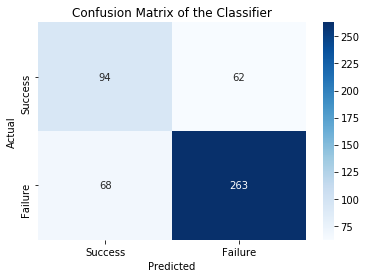

In [231]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Success', 'Failure'])

In [232]:
[y_test, logreg_pred]

[629     1
 695     1
 475     1
 1066    1
 1830    0
 12      1
 774     1
 891     1
 1165    1
 1654    0
 1019    1
 501     1
 946     1
 962     1
 1134    1
 476     1
 1292    1
 1542    0
 1454    0
 1731    0
 1931    0
 1645    0
 188     1
 1409    0
 1039    1
 28      1
 1857    0
 847     1
 1752    0
 355     1
 1144    1
 1665    0
 90      1
 353     1
 1205    1
 208     1
 660     1
 1556    0
 1236    1
 698     1
 1010    1
 1557    0
 926     1
 949     1
 555     1
 778     1
 663     1
 954     1
 1375    0
 556     1
 63      1
 1258    1
 1359    0
 711     1
 1298    1
 1265    1
 685     1
 1366    0
 1027    1
 415     1
 497     1
 223     1
 806     1
 850     1
 1889    0
 567     1
 554     1
 116     1
 284     1
 1267    1
 10      1
 178     1
 919     1
 103     1
 1597    0
 1068    1
 1718    0
 1895    0
 173     1
 1232    1
 721     1
 1219    1
 1847    0
 1372    0
 780     1
 1936    0
 959     1
 1441    0
 458     1
 57      1
 833     1

In [233]:
logreg_fit.coef_

array([[ 0.00343179,  0.74401745,  0.23960522, -0.27205002,  0.05765417,
        -0.71752705,  0.66087673, -1.18755996,  0.33803071]])

In [234]:
logreg_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [235]:
#probabilities between being a 0 vs. a 1
logreg_fit.predict_proba(X_test)

array([[0.04696645, 0.95303355],
       [0.04661153, 0.95338847],
       [0.01164908, 0.98835092],
       [0.65531109, 0.34468891],
       [0.75588651, 0.24411349],
       [0.0100609 , 0.9899391 ],
       [0.14773675, 0.85226325],
       [0.44828123, 0.55171877],
       [0.6611726 , 0.3388274 ],
       [0.35742107, 0.64257893],
       [0.18105642, 0.81894358],
       [0.03832952, 0.96167048],
       [0.58229651, 0.41770349],
       [0.5879624 , 0.4120376 ],
       [0.84088686, 0.15911314],
       [0.0367237 , 0.9632763 ],
       [0.683401  , 0.316599  ],
       [0.62357166, 0.37642834],
       [0.57495608, 0.42504392],
       [0.79213139, 0.20786861],
       [0.66427635, 0.33572365],
       [0.52063566, 0.47936434],
       [0.05086953, 0.94913047],
       [0.66552595, 0.33447405],
       [0.49577585, 0.50422415],
       [0.03939362, 0.96060638],
       [0.22012666, 0.77987334],
       [0.5200214 , 0.4799786 ],
       [0.77781711, 0.22218289],
       [0.00673465, 0.99326535],
       [0.

In [236]:
# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.6985630180494229

In [237]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7331, 0.6986]


 <br><br>Let's create other Classification Models Types:<br><br>
     1.- Find the optimal number of neighbors<br>
     2.- We are going to scale the explanatory variable<br>
     3.- Build a KNN Classification Model<br><br>
    

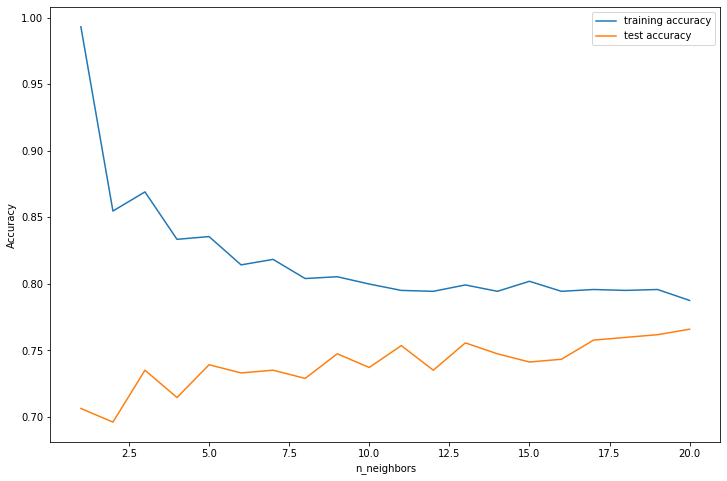

The optimal number of neighbors is: 20


In [238]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = apprentice_data, 
                                  y_data = apprentice_target,
                                  #max_neighbors = 50,
                                  response_type = 'class')

In [239]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(apprentice_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(apprentice_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            apprentice_target,
            random_state = 222,
            test_size = 0.25,
            stratify = apprentice_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7944
Testing  ACCURACY: 0.7556
AUC Score        : 0.7304


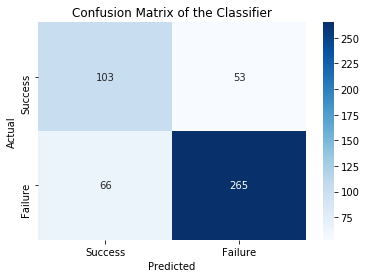

In [240]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Success', 'Failure'])

In [241]:
# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7331, 0.6986]
['KNN Classification', 0.7944, 0.7556, 0.7304]


In [242]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 0.9952
Testing  ACCURACY: 0.7495
AUC Score        : 0.7242


In [243]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7331, 0.6986]
['KNN Classification', 0.7944, 0.7556, 0.7304]
['Full Tree', 0.9952, 0.7495, 0.7242]


Training ACCURACY: 0.804
Testing  ACCURACY: 0.7721
AUC Score        : 0.7561


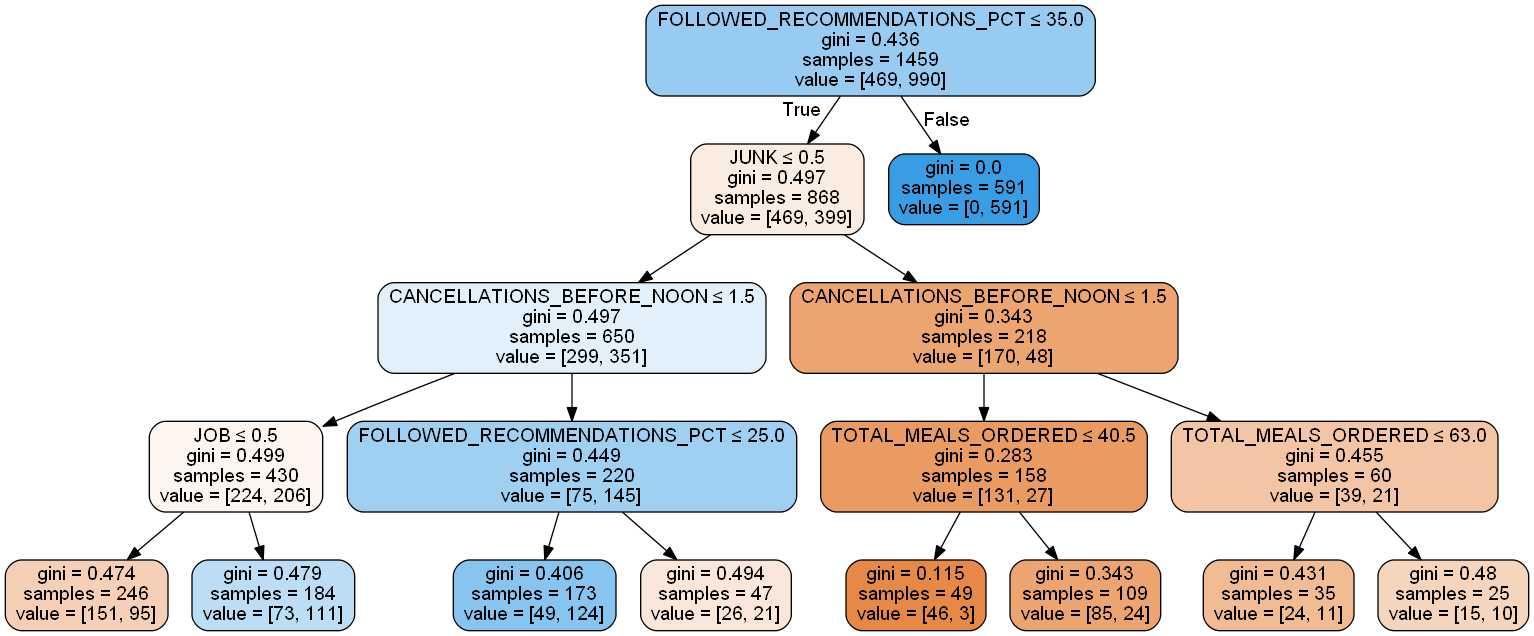

In [244]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

C:\Users\jhj95\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


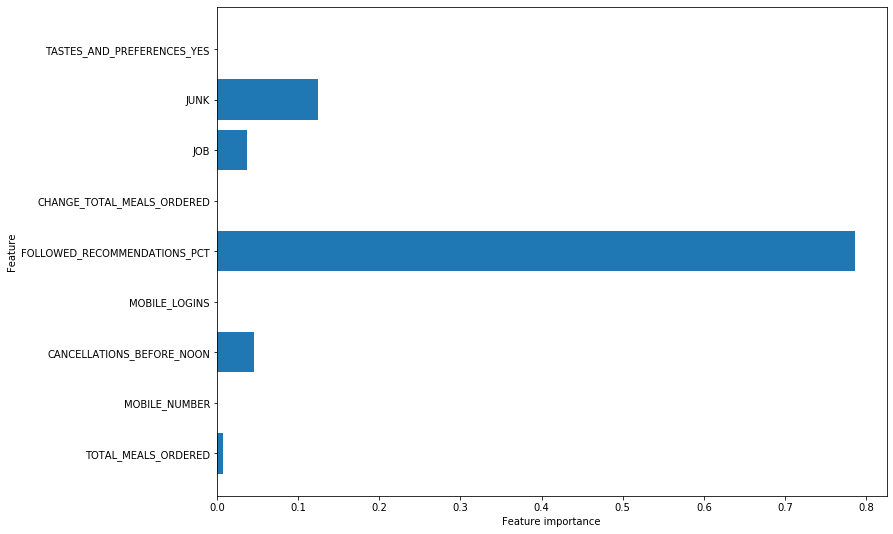

In [245]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

 <br><br>As we see, the decission tree is giving importance to mainly the variables we are using
    in our models. So it seems we are doing good.<br><br>

In [246]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# checking the results
for model in model_performance:
    print(model)
    

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7331, 0.6986]
['KNN Classification', 0.7944, 0.7556, 0.7304]
['Full Tree', 0.9952, 0.7495, 0.7242]
['Pruned Tree', 0.804, 0.7721, 0.7561]


 <br><br>Now we are going to use the GridSearchCV:<br><br>
    GridSearchCV compute every combination of hyperparameters it is given, in an automatic process.<br>
    First, we will try it with the Logistic Regression Model.<br><br>

In [247]:
# declaring a hyperparameter space
#C_space          = pd.np.arange(0.1, 3.0, 0.1)
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'C'          : C_space,
#              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(solver = 'lbfgs',
#                              random_state = 222)


# GridSearchCV object
#lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
#                           param_grid = param_grid,
#                           cv         = 3,
#                           scoring    = make_scorer(roc_auc_score,
#                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(apprentice_data, apprentice_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))



<br><br>Let's check the tuned results from GridSearchCV to use it in the model and consequently 
improve its performance:<br><br>

In [248]:
#lr_tuned_cv.best_estimator_

In [249]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C=0.30000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=222, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)


# FIT step is not needed
lr_tuned_fit  = lr_tuned.fit(apprentice_data, apprentice_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7642
Testing  ACCURACY: 0.731
AUC Score        : 0.692


C:\Users\jhj95\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [250]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# saving the results
model_performance.append(['Tuned LR',
                          lr_train_acc,
                          lr_test_acc,
                          lr_auc])

# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7331, 0.6986]
['KNN Classification', 0.7944, 0.7556, 0.7304]
['Full Tree', 0.9952, 0.7495, 0.7242]
['Pruned Tree', 0.804, 0.7721, 0.7561]
['Tuned LR', 0.7642, 0.731, 0.692]


<br><br>Let's tune now a Decision Tree Model with GridsearchCV:<br>

In [251]:
# declaring a hyperparameter space
#criterion_space = ['gini', 'entropy']
#splitter_space = ['best', 'random']
#depth_space = pd.np.arange(1, 25)
#leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
#              'splitter'         : splitter_space,
#              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object
#tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
#                             param_grid = param_grid,
#                             cv         = 3,
#                             scoring    = make_scorer(roc_auc_score,
#                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(apprentice_data, apprentice_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [252]:
#tuned_tree_cv.best_estimator_

In [253]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a decision tree model with tuned values
tree_tuned = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=222, splitter='random')


# FIT step is not needed
tree_tuned_fit  = tree_tuned.fit(apprentice_data, apprentice_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.8492
Testing  ACCURACY: 0.8214
AUC Score        : 0.8144


<br><br>Let's see how actually looks this tree!<br>

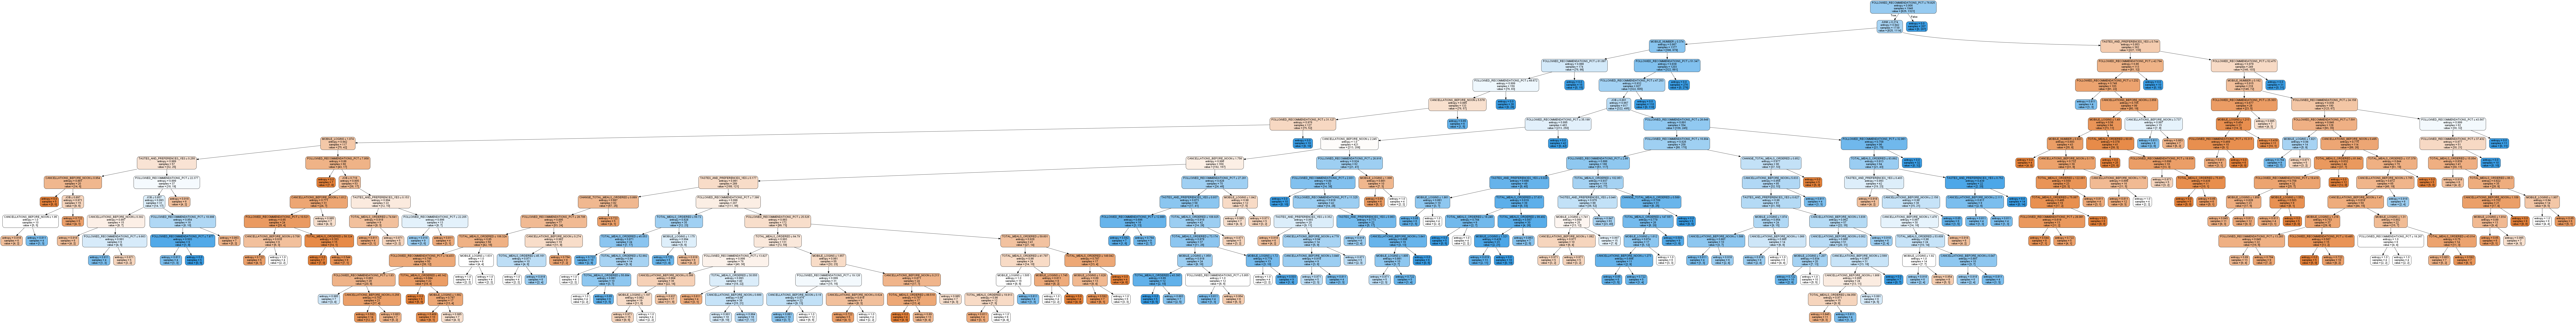

In [254]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = apprentice_data,
             height = 2000,
             width  = 2000)

In [255]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# saving the results
model_performance.append(['Tuned Tree',
                          tree_train_acc,
                          tree_test_acc,
                          tree_auc])



# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7622, 0.7331, 0.6986]
['KNN Classification', 0.7944, 0.7556, 0.7304]
['Full Tree', 0.9952, 0.7495, 0.7242]
['Pruned Tree', 0.804, 0.7721, 0.7561]
['Tuned LR', 0.7642, 0.731, 0.692]
['Tuned Tree', 0.8492, 0.8214, 0.8144]


<br><br>Let's tune now a Random Forest Model with GridsearchCV<br>

In [256]:
# declaring a hyperparameter space
#estimator_space  = pd.np.arange(100, 1100, 250)
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#full_forest_grid = RandomForestClassifier(random_state = 222)


# GridSearchCV object
#full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_forest_cv.fit(apprentice_data, apprentice_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_forest_cv.best_params_)
#print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

In [257]:
# INSTANTIATING the model object without hyperparameters
#full_rf_tuned = RandomForestClassifier(bootstrap        = True,
#                                       criterion        = 'gini',
#                                       min_samples_leaf = 11,
#                                       n_estimators     = 850,
#                                       warm_start       = True,
#                                       random_state     = 802)


# FIT step is needed as we are not using .best_estimator
#full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
#full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)


# SCORING the results
#print('Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
#print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
#print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                          y_score = full_rf_tuned_pred).round(4))

In [258]:
# declaring model performance objects
#rf_train_acc = full_rf_tuned_fit.score(X_train, y_train).round(4)
#rf_test_acc  = full_rf_tuned_fit.score(X_test, y_test).round(4)
#rf_auc       = roc_auc_score(y_true  = y_test,
#                             y_score = full_rf_tuned_pred).round(4)



# saving the results
#model_performance.append(['Tuned Random Forest',
#                          rf_train_acc,
#                          rf_test_acc,
#                          rf_auc])



# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7622            0.7331     0.6986
1   KNN Classification             0.7944            0.7556     0.7304
2            Full Tree             0.9952            0.7495     0.7242
3          Pruned Tree             0.8040            0.7721     0.7561
4             Tuned LR             0.7642            0.7310     0.6920
5           Tuned Tree             0.8492            0.8214     0.8144

In [259]:
#print(datetime.now() - startTime)

0:00:44.725232
